In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import set_style
set_style("whitegrid")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [9]:
# Reading in data

data = pd.read_csv('/Users/Chris/Documents/Data/train.csv/train.csv')

In [27]:
# Train-test split

data_train, data_test = train_test_split(data.copy(deep=True), test_size=0.1, random_state=314,
                                          stratify=data['Cover_Type'])

We want to see if the cover types are evenly distributed. It turns out they are perfectly distributed!

In [28]:
classes = [0,0,0,0,0,0,0]

for x in data_train['Cover_Type']:
    classes[x-1] = classes[x-1] + 1

print(classes)

[1944, 1944, 1944, 1944, 1944, 1944, 1944]


In [62]:
# Definining the continuous variables (soil types and wilderness areas are the categorical variables)

contvars = data.columns[1:11]

Making histograms for each continuous variable:

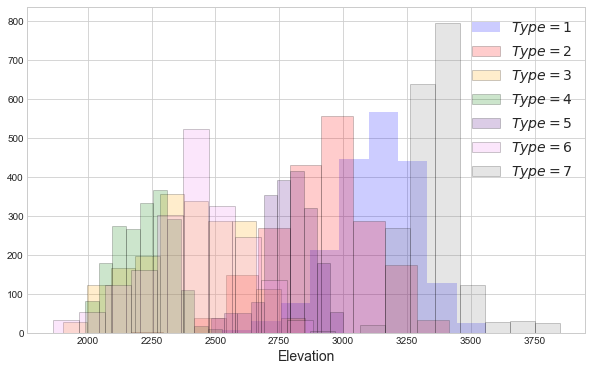

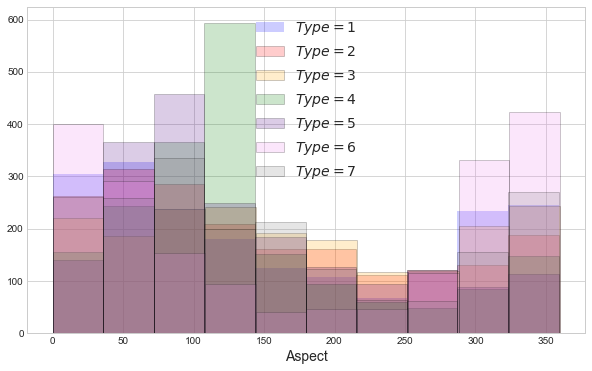

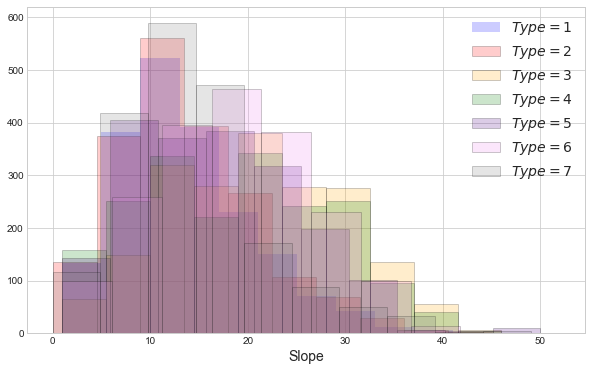

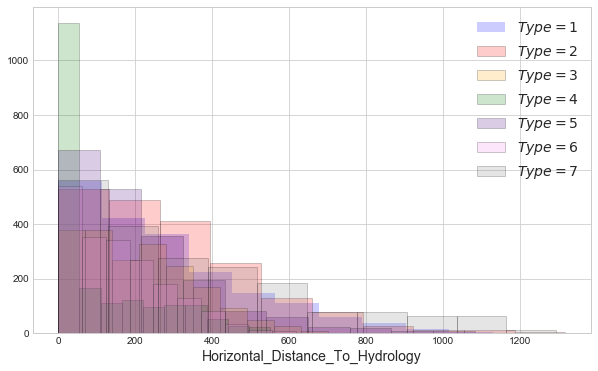

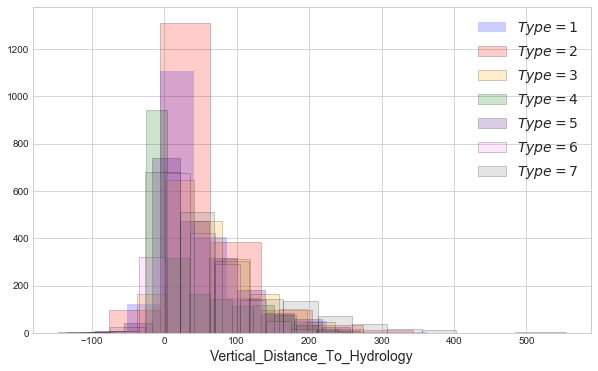

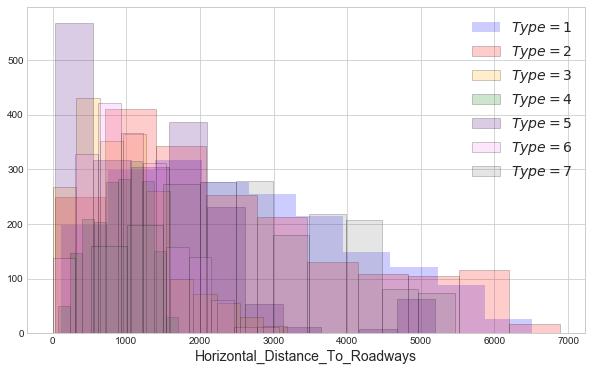

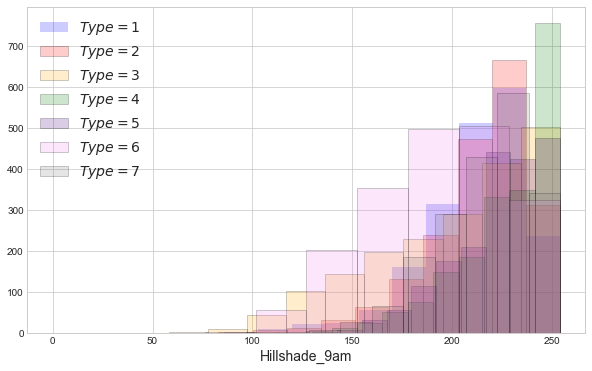

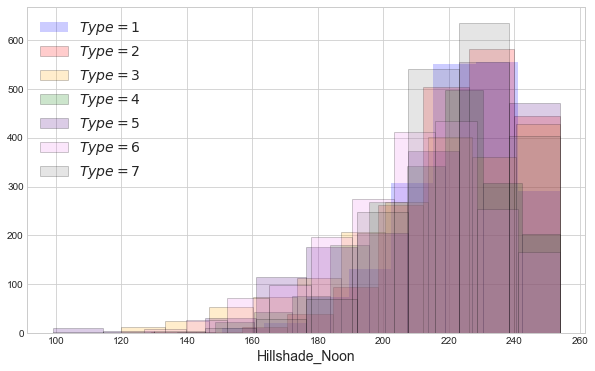

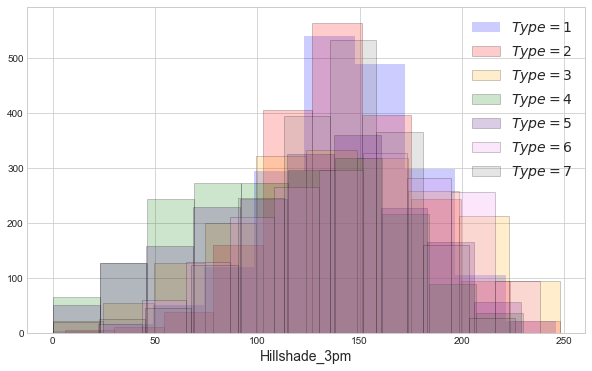

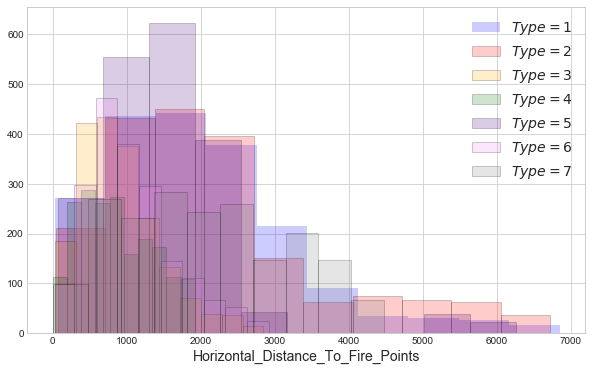

In [31]:
for trait in contvars:
    plt.figure(figsize=(10,6))


    plt.hist(data_train.loc[data_train.Cover_Type==1][trait].values,
                color='blue',
                alpha=.2,
                label="$Type=1$")

    plt.hist(data_train.loc[data_train.Cover_Type==2][trait].values,
                color='red',
                alpha=.2,
                edgecolor='black',
                label="$Type=2$")
    
    plt.hist(data_train.loc[data_train.Cover_Type==3][trait].values,
                color='orange',
                alpha=.2,
                
                edgecolor='black',
                label="$Type=3$")
    
    plt.hist(data_train.loc[data_train.Cover_Type==4][trait].values,
                color='green',
                alpha=.2,
                
                edgecolor='black',
                label="$Type=4$")
    
    plt.hist(data_train.loc[data_train.Cover_Type==5][trait].values,
                color='indigo',
                alpha=.2,
                
                edgecolor='black',
                label="$Type=5$")
    
    plt.hist(data_train.loc[data_train.Cover_Type==6][trait].values,
                color='violet',
                alpha=.2,
                
                edgecolor='black',
                label="$Type=6$")
    
    plt.hist(data_train.loc[data_train.Cover_Type==7][trait].values,
                color='grey',
                alpha=.2,  
                edgecolor='black',
                label="$Type=7$")

    plt.xlabel(trait, fontsize=14)
    plt.legend(fontsize=14)

    plt.show()

Notable traits: Elevation. Aspect. Sort of Slope. Horizontal Distance to Fire Points

#### Distribution of cover types for Soil Types 1-40 and for Wilderness Areas 1-40:

In [56]:
# Does the distribution of Cover_Type change for Soil_Type 1-40?
# The output: Each row is a different Soil Type. Each entry of the list is the count of Cover_Type in that soil.

i=1
while i<= 40:
    classes = [0,0,0,0,0,0,0]
    soil = 'Soil_Type' + str(i)
    for x in data_train.loc[data_train[soil]==1].iloc:
        classes[x['Cover_Type']-1] = classes[x['Cover_Type']-1] + 1
    i+=1
    print(classes)

[0, 0, 107, 128, 0, 85, 0]
[0, 2, 254, 81, 55, 169, 0]
[0, 12, 125, 720, 0, 13, 0]
[5, 18, 411, 120, 118, 74, 7]
[0, 0, 52, 37, 0, 66, 0]
[0, 6, 224, 213, 0, 133, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0]
[1, 9, 0, 0, 0, 0, 0]
[9, 75, 644, 151, 56, 995, 0]
[3, 61, 80, 23, 131, 59, 0]
[20, 180, 0, 0, 0, 0, 0]
[16, 77, 4, 0, 274, 60, 0]
[0, 0, 4, 117, 0, 35, 0]
[0, 0, 0, 0, 0, 0, 0]
[8, 13, 5, 36, 9, 34, 0]
[2, 5, 29, 318, 120, 80, 0]
[0, 16, 0, 0, 40, 0, 0]
[12, 11, 0, 0, 17, 0, 0]
[38, 48, 0, 0, 5, 35, 0]
[9, 0, 0, 0, 0, 0, 3]
[253, 48, 0, 0, 0, 0, 16]
[350, 138, 0, 0, 139, 1, 65]
[111, 64, 0, 0, 9, 15, 28]
[0, 0, 0, 0, 0, 0, 0]
[7, 17, 0, 0, 22, 0, 0]
[7, 5, 0, 0, 0, 0, 3]
[0, 5, 0, 0, 3, 0, 0]
[355, 491, 0, 0, 227, 0, 62]
[66, 131, 0, 0, 442, 0, 16]
[103, 89, 0, 0, 78, 7, 23]
[207, 232, 5, 0, 92, 27, 66]
[167, 167, 0, 0, 103, 54, 56]
[0, 10, 0, 0, 4, 2, 4]
[3, 1, 0, 0, 0, 0, 87]
[0, 2, 0, 0, 0, 0, 7]
[0, 0, 0, 0, 0, 0, 27]
[76, 5, 0, 0, 0, 0, 581]
[73, 2, 0, 0, 0, 0, 526]
[43, 3

In [55]:
# Does the distribution of Cover_Type change for Wilderness_Area 1-4?
# The output: Each row is a different Wilderness Area. Each entry of the list is the count of Cover_Type in that area.

i=1
while i<= 4:
    classes = [0,0,0,0,0,0,0]
    wild = 'Wilderness_Area' + str(i)
    for x in data_train.loc[data_train[wild]==1].iloc:
        classes[x['Cover_Type']-1] = classes[x['Cover_Type']-1] + 1
    i+=1
    print(classes)

[948, 1017, 0, 0, 778, 0, 488]
[163, 56, 0, 0, 0, 0, 230]
[833, 852, 771, 0, 1166, 859, 1226]
[0, 19, 1173, 1944, 0, 1085, 0]


Some basic observations can be seen: Every cover type 4 is in Wilderness Area 4.
No trees at all in Soil Type 7.

### The following are visualizations of data via the Mapper algorithm.

In [72]:
# ordered the data by cover type. This will give us a color-coded image.

data_order = pd.read_csv('/Users/Chris/Documents/Data/train.csv/train_ordered.csv')

In [73]:
# Replace each entry with the distance from the mean. I also ordered data by cover_type 

for trait in contvars:
    data_order[trait] = data_order[trait] - data_order[trait].mean()

In [74]:
data_order

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,41,-50.322553,190.323347,-13.501587,-227.195701,-51.076521,381.976786,0.295701,15.034392,23.908003,...,0,0,0,0,0,0,0,0,0,1
1,52,-10.322553,166.323347,8.498413,-142.195701,-8.076521,1403.976786,-63.704299,-13.965608,56.908003,...,0,0,0,0,0,0,0,0,0,1
2,53,-53.322553,-84.676653,-14.501587,-197.195701,-51.076521,1556.976786,9.295701,15.034392,13.908003,...,0,0,0,0,0,0,0,0,0,1
3,56,-27.322553,158.323347,7.498413,-197.195701,-32.076521,1501.976786,-64.704299,-6.965608,64.908003,...,0,0,0,0,0,0,0,0,0,1
4,68,169.677447,-143.676653,-3.501587,-137.195701,-45.076521,3606.976786,-5.704299,-4.965608,6.908003,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,14822,766.677447,163.323347,-2.501587,95.804299,-29.076521,-106.023214,-30.704299,6.034392,47.908003,...,0,0,0,0,0,0,0,0,1,7
15116,14824,539.677447,-60.676653,-7.501587,218.804299,-32.076521,1977.976786,21.295701,9.034392,-10.091997,...,0,0,1,0,0,0,0,0,0,7
15117,14825,759.677447,170.323347,-1.501587,-37.195701,-36.076521,-25.023214,-29.704299,4.034392,42.908003,...,0,0,0,0,0,0,0,0,1,7
15118,14828,825.677447,183.323347,-0.501587,72.804299,29.923479,101.976786,-27.704299,-2.965608,32.908003,...,0,0,0,0,0,0,0,0,1,7


In [66]:
import kmapper as km
from kmapper import jupyter # Creates custom CSS full-size Jupyter screen

In [104]:
datatest = data_order[['Aspect','Elevation']].to_numpy()

In [108]:
mapper = km.KeplerMapper(verbose=1)

# Fit to and transform the data
projected_data = mapper.fit_transform(datatest, projection=[0,1]) # X-Y axis

# Create a cover with 4 elements
cover = km.Cover(n_cubes=10, perc_overlap=0.3)

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (15120, 2)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler()



In [109]:
# Creates the graph. This normally takes awhile.

graph = mapper.map(projected_data, cover=cover)

Mapping on data shaped (15120, 2) using lens shaped (15120, 2)

Creating 100 hypercubes.

Created 312 edges and 95 nodes in 0:00:00.834983.


In [110]:
# Creates cool looking display. As soon as the display comes up, press p then e for it to look better

display = mapper.visualize(graph, path_html="filename.html",
                 title="data")
jupyter.display(path_html="filename.html")

Wrote visualization to: filename.html
